In [49]:
# Install Dependencies
! pip install pyspark
! pip install py4j
! pip install findspark

In [50]:
# Verify Spark works

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SmartSales").getOrCreate()
print(spark)

In [51]:
# Sales Table
from pyspark.sql import SparkSession

spark.conf.set("spark.sql.caseSensitive", "false")

# Start a Spark session
spark = SparkSession.builder \
    .appName("sales_data_preparedcsv") \
    .getOrCreate()

# Path to your CSV file
csv_path = "/Users/craigwilcox/Projects/smart-store-craigwilcox/Data/prepared/sales_data_prepared.csv"

# Load CSV into DataFrame
df_sales = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(csv_path)

# Show data
df_sales.show()


25/04/11 09:59:12 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
25/04/11 09:59:12 DEBUG SparkSession: Configurations that might not take effect:
  spark.app.name=sales_data_preparedcsv
25/04/11 09:59:12 DEBUG DataSource: Some paths were ignored:
  
25/04/11 09:59:12 INFO InMemoryFileIndex: It took 1 ms to list leaf files for 1 paths.
25/04/11 09:59:12 INFO InMemoryFileIndex: It took 0 ms to list leaf files for 1 paths.
25/04/11 09:59:12 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#1020
25/04/11 09:59:12 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#1027
25/04/11 09:59:12 INFO FileSourceStrategy: Pushed Filters: 
25/04/11 09:59:12 INFO FileSourceStrategy: Post-Scan Filters: (length(trim(value#1020, None)) > 0)
25/04/11 09:59:12 DEBUG WholeStageCodegenExec: 
/* 001 */ public Object generate(Object[] references) {
/* 002 */   return new GeneratedIteratorForCodegenStage1(references);
/* 003 */ }
/* 004 */


+-------------+--------+----------+---------+-------+----------+----------+-----------------+--------+
|transactionid|saledate|customerid|productid|storeid|campaignid|saleamount|loyaltypercentage|billtype|
+-------------+--------+----------+---------+-------+----------+----------+-----------------+--------+
|          550|  1/6/24|      1008|      102|    404|         0|      39.1|                5|    Paid|
|          551|  1/6/24|      1009|      105|    403|         0|     19.78|                5|    Paid|
|          552| 1/16/24|      1004|      107|    404|         0|     335.1|                5|    Paid|
|          553| 1/16/24|      1006|      102|    406|         0|     195.5|                5| Invoice|
|          554| 1/25/24|      1005|      102|    405|         0|     117.3|                5| Invoice|
|          555| 1/25/24|      1001|      101|    401|         0|   2379.36|               20| Invoice|
|          556| 1/29/24|      1009|      104|    403|         0|     172.

25/04/11 09:59:12 INFO BlockManagerInfo: Added broadcast_67_piece0 in memory on macbookpro.lan:57375 (size: 34.7 KiB, free: 366.1 MiB)
25/04/11 09:59:12 DEBUG BlockManagerMaster: Updated info of block broadcast_67_piece0
25/04/11 09:59:12 DEBUG BlockManager: Told master about block broadcast_67_piece0
25/04/11 09:59:12 DEBUG BlockManager: Put block broadcast_67_piece0 locally took 0 ms
25/04/11 09:59:12 DEBUG BlockManager: Putting block broadcast_67_piece0 without replication took 0 ms
25/04/11 09:59:12 INFO SparkContext: Created broadcast 67 from showString at NativeMethodAccessorImpl.java:0
25/04/11 09:59:12 INFO FileSourceScanExec: Planning scan with bin packing, max size: 4194304 bytes, open cost is considered as scanning 4194304 bytes.
25/04/11 09:59:12 DEBUG ClosureCleaner: Cleaning indylambda closure: $anonfun$doExecute$4$adapted
25/04/11 09:59:12 DEBUG ClosureCleaner:  +++ indylambda closure ($anonfun$doExecute$4$adapted) is now cleaned +++
25/04/11 09:59:12 DEBUG ClosureCleane

In [52]:
# Customers Tables

spark.conf.set("spark.sql.caseSensitive", "false")

# Path to your customer CSV file
customer_csv_path = "/Users/craigwilcox/Projects/smart-store-craigwilcox/Data/prepared/customers_data_prepared.csv"

# Load customer data into DataFrame
df_customer = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(customer_csv_path)

# Register the DataFrame as a temporary view
df_customer.createOrReplaceTempView("customer")


25/04/11 09:59:13 DEBUG DataSource: Some paths were ignored:
  
25/04/11 09:59:13 INFO InMemoryFileIndex: It took 1 ms to list leaf files for 1 paths.
25/04/11 09:59:13 INFO InMemoryFileIndex: It took 1 ms to list leaf files for 1 paths.
25/04/11 09:59:13 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#1102
25/04/11 09:59:13 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#1109
25/04/11 09:59:13 INFO FileSourceStrategy: Pushed Filters: 
25/04/11 09:59:13 INFO FileSourceStrategy: Post-Scan Filters: (length(trim(value#1102, None)) > 0)
25/04/11 09:59:13 DEBUG WholeStageCodegenExec: 
/* 001 */ public Object generate(Object[] references) {
/* 002 */   return new GeneratedIteratorForCodegenStage1(references);
/* 003 */ }
/* 004 */
/* 005 */ // codegenStageId=1
/* 006 */ final class GeneratedIteratorForCodegenStage1 extends org.apache.spark.sql.execution.BufferedRowIterator {
/* 007 */   private Object[] references;
/* 008 */   private scala.collection.Iterator[] input

In [53]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("SmartSales").getOrCreate()

# Register DataFrames as temporary views (if not already done)
df_sales.createOrReplaceTempView("sales")
df_customer.createOrReplaceTempView("customer")

# Write query using Spark SQL
df_top_customers = spark.sql("""
    SELECT c.Name, SUM(s.saleamount) AS total_spent
    FROM sales s
    JOIN customer c ON s.customerid = c.CustomerID
    GROUP BY c.Name
    ORDER BY total_spent DESC
""")

# Show Spark results
df_top_customers.show()

# Convert to Pandas for use with charts
import pandas as pd
df_top_customers_pd = df_top_customers.toPandas()

25/04/11 09:59:13 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
25/04/11 09:59:13 DEBUG SparkSession: Configurations that might not take effect:
  spark.app.name=SmartSales
25/04/11 09:59:13 DEBUG SparkSqlParser: Parsing command: sales
25/04/11 09:59:13 DEBUG SparkSqlParser: Parsing command: customer
25/04/11 09:59:13 DEBUG SparkSqlParser: Parsing command: 
    SELECT c.Name, SUM(s.saleamount) AS total_spent
    FROM sales s
    JOIN customer c ON s.customerid = c.CustomerID
    GROUP BY c.Name
    ORDER BY total_spent DESC

25/04/11 09:59:13 DEBUG Analyzer$ResolveReferences: Resolving 's.customerid to customerid#1039
25/04/11 09:59:13 DEBUG Analyzer$ResolveReferences: Resolving 'c.CustomerID to CustomerID#1119
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate: Resolving 'c.Name to Name#1120
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate: Resolving 'c.Name to Name#1120
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate:

+----------------+------------------+
|            Name|       total_spent|
+----------------+------------------+
|   William White|23752.520000000004|
|Hermione Granger|          22822.54|
|   Susan Johnson|           12422.6|
|       Chewbacca|11813.439999999999|
|   Tiffany James|          11715.82|
| Hermione Grager|           8750.94|
|    Wylie Coyote|           7434.44|
|          Dr Who|4064.8599999999997|
|       Dan Brown|2427.2999999999997|
|    Jason Bourne|           1806.34|
|      Tony Stark|           1545.54|
+----------------+------------------+



25/04/11 09:59:13 DEBUG LocalDiskShuffleMapOutputWriter: Writing shuffle index file for mapId 46 with length 200
25/04/11 09:59:13 DEBUG IndexShuffleBlockResolver: Shuffle index for mapId 46: [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,83,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
25/04/11 09:59:13 INFO Executor: Finished task 0.0 in stage 54.0 (TID 46). 3509 bytes result sent to driver
25/04/11 09:59:13 DEBUG ExecutorMetricsPoller: stageTCMP: (54, 0) -> 0
25/04/11 09:59:13 INFO TaskSetManager: Finished task 0.0 in stage 54.0 (TID 46) in 33 ms on macbookpro.lan (executor driver) (1/1)
25/04/11 09:59:13 INFO TaskSchedulerImpl: Removed TaskSet 54.0, whose tasks have all 

In [54]:
from pyspark.sql.functions import col, to_date, year, quarter, month

# Step 1: Ensure the `saledate` is in date format if it's a string
df_sales = df_sales.withColumn("saledate", to_date(col("saledate"), "yyyy-MM-dd"))

# Step 2: Filter the data (Make sure `saledate` is in date format for comparison)
df_filtered = df_sales.filter(df_sales.saledate >= "2023-01-01")

# Step 3: Group by `billtype` and `storeid`, sum `amount`
df_sales.groupby("billtype", "storeid").sum("saleamount").show()

# Step 4: Extract `year`, `quarter`, and `month` from `saledate`
df_sales = df_sales.withColumn("year", year(df_sales.saledate))
df_sales = df_sales.withColumn("quarter", quarter(df_sales.saledate))
df_sales = df_sales.withColumn("month", month(df_sales.saledate))

# Step 5: Group by `year`, `quarter`, and `month`, sum `saleamount`
df_sales.groupby("year", "quarter", "month").sum("saleamount").show()

25/04/11 09:59:13 DEBUG Analyzer$ResolveReferences: Resolving 'saledate to saledate#1038
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate: Resolving 'billtype to billtype#1045
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate: Resolving 'storeid to storeid#1041
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate: Resolving 'billtype to billtype#1045
25/04/11 09:59:13 DEBUG ResolveReferencesInAggregate: Resolving 'storeid to storeid#1041
25/04/11 09:59:13 INFO FileSourceStrategy: Pushed Filters: 
25/04/11 09:59:13 INFO FileSourceStrategy: Post-Scan Filters: 
25/04/11 09:59:13 DEBUG InsertAdaptiveSparkPlan: Adaptive execution enabled for plan: CollectLimit 21
+- HashAggregate(keys=[billtype#1045, storeid#1041], functions=[sum(saleamount#1043)], output=[toprettystring(billtype)#1189, toprettystring(storeid)#1190, toprettystring(sum(saleamount))#1191])
   +- HashAggregate(keys=[billtype#1045, storeid#1041], functions=[partial_sum(saleamount#1043)], output=[billtype#1045, storeid#10

+--------+-------+------------------+
|billtype|storeid|   sum(saleamount)|
+--------+-------+------------------+
| Invoice|    406|            391.82|
| Invoice|    402| 4940.400000000001|
| Invoice|    404|             431.0|
|  Credit|    406|3375.6800000000003|
|  Credit|    401|            7889.6|
|  Credit|    402|          23673.66|
| Invoice|    403|            593.98|
|  Credit|    405|1367.6399999999999|
|  Credit|    404|          12474.66|
| Invoice|    405|           6640.54|
|    Paid|    403|           2846.54|
|    Paid|    402|1642.9199999999998|
|  Credit|    403|            793.12|
|    Paid|    404|453.32000000000005|
| Invoice|    401|16515.920000000002|
|    Paid|    406|           7948.32|
|    Paid|    401|           8097.94|
|    Paid|    405| 8479.279999999999|
+--------+-------+------------------+

+----+-------+-----+------------------+
|year|quarter|month|   sum(saleamount)|
+----+-------+-----+------------------+
|NULL|   NULL| NULL|108556.34000000004|
+--

25/04/11 09:59:14 DEBUG ClosureCleaner: Cleaning indylambda closure: $anonfun$doExecute$4$adapted
25/04/11 09:59:14 DEBUG ClosureCleaner:  +++ indylambda closure ($anonfun$doExecute$4$adapted) is now cleaned +++
25/04/11 09:59:14 DEBUG DAGScheduler: eagerlyComputePartitionsForRddAndAncestors for RDD 213 took 0.000027 seconds
25/04/11 09:59:14 DEBUG DAGScheduler: Merging stage rdd profiles: Set()
25/04/11 09:59:14 INFO DAGScheduler: Registering RDD 213 (showString at <unknown>:0) as input to shuffle 9
25/04/11 09:59:14 INFO DAGScheduler: Got map stage job 52 (showString at <unknown>:0) with 1 output partitions
25/04/11 09:59:14 INFO DAGScheduler: Final stage: ShuffleMapStage 65 (showString at <unknown>:0)
25/04/11 09:59:14 INFO DAGScheduler: Parents of final stage: List()
25/04/11 09:59:14 INFO DAGScheduler: Missing parents: List()
25/04/11 09:59:14 DEBUG DAGScheduler: submitStage(ShuffleMapStage 65 (name=showString at <unknown>:0;jobs=52))
25/04/11 09:59:14 DEBUG DAGScheduler: missing:

In [55]:
print(df_top_customers_pd.columns)

Index(['Name', 'total_spent'], dtype='object')


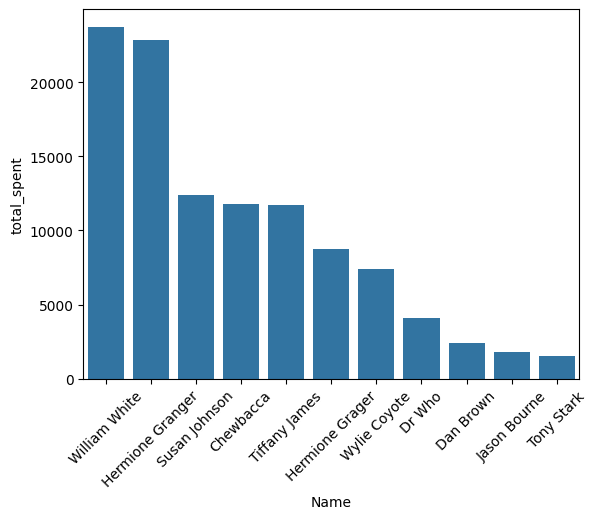

25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (50, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (67, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (52, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (61, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (54, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (53, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (56, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (65, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (47, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (45, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (49, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: removing (46, 0) from stageTCMP
25/04/11 09:59:15 DEBUG ExecutorMetricsPoller: remov

In [56]:
# All imports at the top, organized
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_top_customers_pd, x="Name", y="total_spent")
plt.xticks(rotation=45)
plt.show()